Mean aspect ratio: 1.6725295078486402
Median aspect ratio: 1.5015015015015014


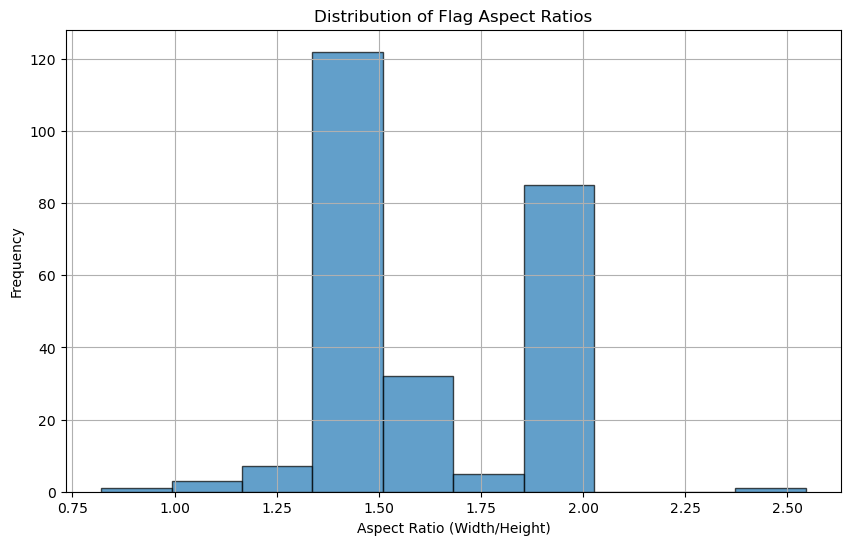

In [10]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Folder containing your flag images
flags_dir = "/Users/shivansh420/Desktop/MMDP-2_Dataset/Task-3/Task-A/flags"

aspect_ratios = []
flag_files = [f for f in os.listdir(flags_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

for file in flag_files:
    path = os.path.join(flags_dir, file)
    try:
        with Image.open(path) as img:
            width, height = img.size
            ratio = width / height
            aspect_ratios.append(ratio)
    except Exception as e:
        print(f"Error processing {file}: {e}")

aspect_ratios = np.array(aspect_ratios)

# Summary statistics
mean_ratio = np.mean(aspect_ratios)
median_ratio = np.median(aspect_ratios)
print("Mean aspect ratio:", mean_ratio)
print("Median aspect ratio:", median_ratio)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(aspect_ratios, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel("Aspect Ratio (Width/Height)")
plt.ylabel("Frequency")
plt.title("Distribution of Flag Aspect Ratios")
plt.grid(True)
plt.show()


Outlier aspect ratios: [2.544529262086514, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.25, 2.0, 2.0, 2.0, 2.0, 1.375515818431912, 1.4005602240896358, 2.0, 2.0, 1.3333333333333333, 2.0, 2.0, 2.0, 2.0, 2.0, 1.375515818431912, 2.0, 1.375515818431912, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.375515818431912, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.1668611435239207, 1.3888888888888888, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.1534025374855825, 2.0, 2.0, 1.375515818431912, 2.0, 2.0, 1.3333333333333333, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.321003963011889, 1.3333333333333333, 1.4005602240896358, 2.0, 2.0, 0.8203445447087777, 2.0, 1.3333333333333333, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


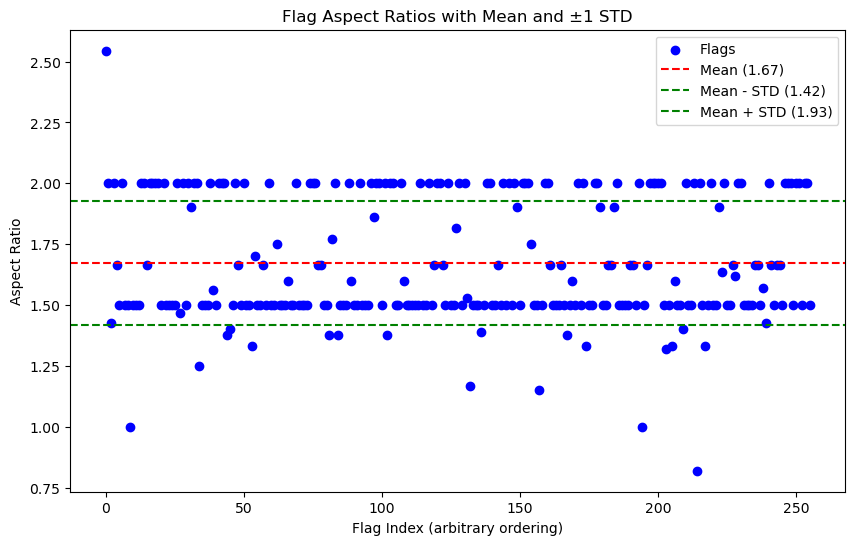

In [11]:
import matplotlib.pyplot as plt

# Define outliers as those flags with an aspect ratio more than one standard deviation from the mean
std_ratio = np.std(aspect_ratios)
lower_bound = mean_ratio - std_ratio
upper_bound = mean_ratio + std_ratio

outliers = [r for r in aspect_ratios if r < lower_bound or r > upper_bound]
print("Outlier aspect ratios:", outliers)

# Mark each flag's aspect ratio as a dot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(aspect_ratios)), aspect_ratios, color='blue', label="Flags")
plt.axhline(y=mean_ratio, color='red', linestyle='--', label=f"Mean ({mean_ratio:.2f})")
plt.axhline(y=lower_bound, color='green', linestyle='--', label=f"Mean - STD ({lower_bound:.2f})")
plt.axhline(y=upper_bound, color='green', linestyle='--', label=f"Mean + STD ({upper_bound:.2f})")
plt.xlabel("Flag Index (arbitrary ordering)")
plt.ylabel("Aspect Ratio")
plt.title("Flag Aspect Ratios with Mean and ±1 STD")
plt.legend()
plt.show()

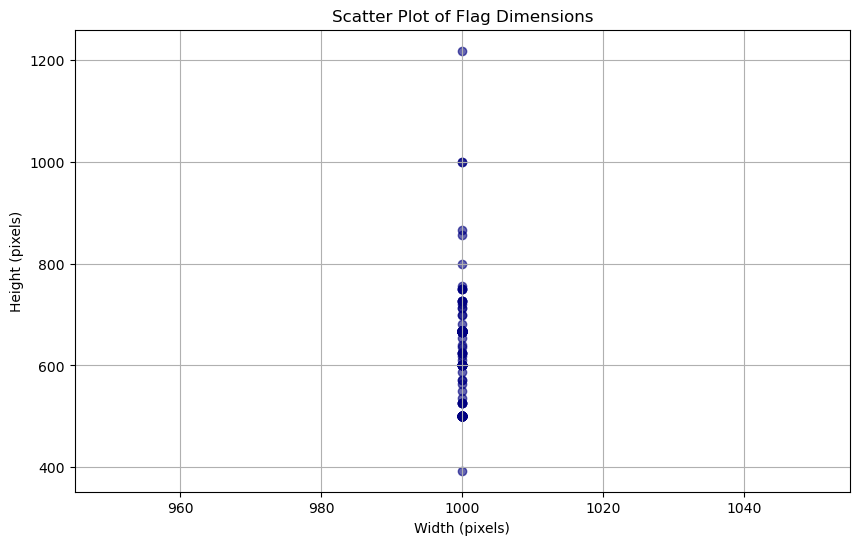

In [12]:
flags_dir = "/Users/shivansh420/Desktop/MMDP-2_Dataset/Task-3/Task-A/flags"  # Folder containing your flag images (PNG, JPG, etc.)
widths = []
heights = []
flag_names = []

for file in os.listdir(flags_dir):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        path = os.path.join(flags_dir, file)
        try:
            with Image.open(path) as img:
                w, h = img.size
                widths.append(w)
                heights.append(h)
                flag_names.append(file)
        except Exception as e:
            print(f"Error processing {file}: {e}")

plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, alpha=0.6, color='navy')
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.title("Scatter Plot of Flag Dimensions")
plt.grid(True)
plt.show()


In [14]:
# %% Cell 4: 3D Scatter Plot of Average RGB Values
import plotly.express as px
import pandas as pd

avg_colors = []
files_used = []

for file in os.listdir(flags_dir):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        filepath = os.path.join(flags_dir, file)
        try:
            with Image.open(filepath) as img:
                data = np.array(img)
                # Ensure image has 3 channels
                if len(data.shape) == 3:
                    avg_r = np.mean(data[:,:,0])
                    avg_g = np.mean(data[:,:,1])
                    avg_b = np.mean(data[:,:,2])
                    avg_colors.append((avg_r, avg_g, avg_b))
                    files_used.append(file)
        except Exception as e:
            print(f"Error processing {file}: {e}")

# Convert to DataFrame for Plotly
df_colors = pd.DataFrame(avg_colors, columns=["Avg_R", "Avg_G", "Avg_B"])
df_colors["Flag"] = files_used

fig = px.scatter_3d(df_colors, x="Avg_R", y="Avg_G", z="Avg_B",
                    hover_name="Flag",
                    color="Avg_R",
                    title="3D Scatter Plot of Average RGB Values of Flag Images",
                    labels={"Avg_R": "Average Red", "Avg_G": "Average Green", "Avg_B": "Average Blue"})
fig.show()
